## PROBLEM STATEMENT-
#### Prepare a classification model using Naive Bayes
#### for salary data

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


#### Importing  packages

In [4]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading the data

In [7]:
df_train = pd.read_csv("E:\\deeksha\\python\\data\\SalaryData_Train.csv")

#### Performing EDA on data

In [127]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [128]:
## checking nulls and na's in the data

In [129]:
df_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
target           0
dtype: int64

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
 14  target         30161 non-null  int32 
dtypes: int32(1), int64(5), object(9)
memory usage: 3.3+ MB


In [131]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek,target
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269,0.248931
std,13.134830,2.550037,7406.466611,404.121321,11.980182,0.432401
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [132]:
df_train.shape

(30161, 15)

In [13]:
df_train["Salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

#### Creating new column in reference to salary 

In [14]:
import numpy as np

In [133]:
df_train['target'] = np.where(df_train["Salary"] == ' >50K', 1, 0)

In [134]:
df_train['target']

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: target, Length: 30161, dtype: int32

In [135]:
df_train.drop(['Salary'],axis=1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### Correlation among features

In [136]:
df_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,target
age,1.000000,0.043525,0.080152,0.060278,0.101598,0.241991
educationno,0.043525,1.000000,0.124416,0.079691,0.152522,0.335287
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431,0.221195
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454,0.150222
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000,0.229480
target,0.241991,0.335287,0.221195,0.150222,0.229480,1.000000


### Plotting Heat Map

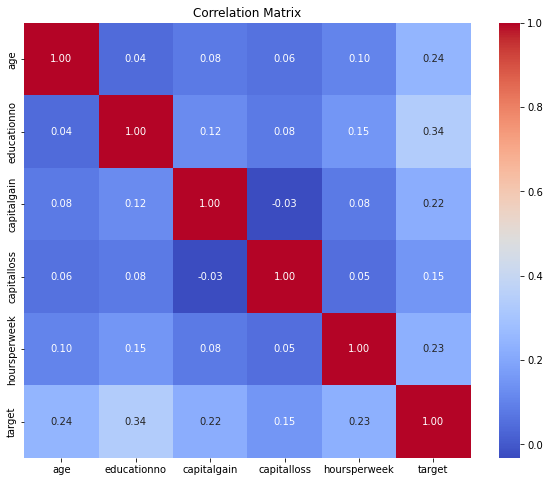

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

import warnings
warnings.filterwarnings("ignore")

### Histogram on data

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'capitalgain'}>,
        <AxesSubplot:title={'center':'capitalloss'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

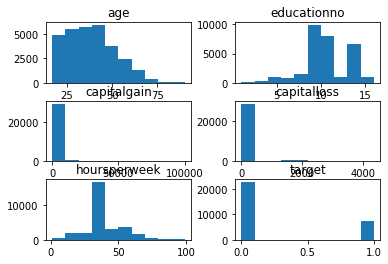

In [138]:
df_train.hist(grid = False)

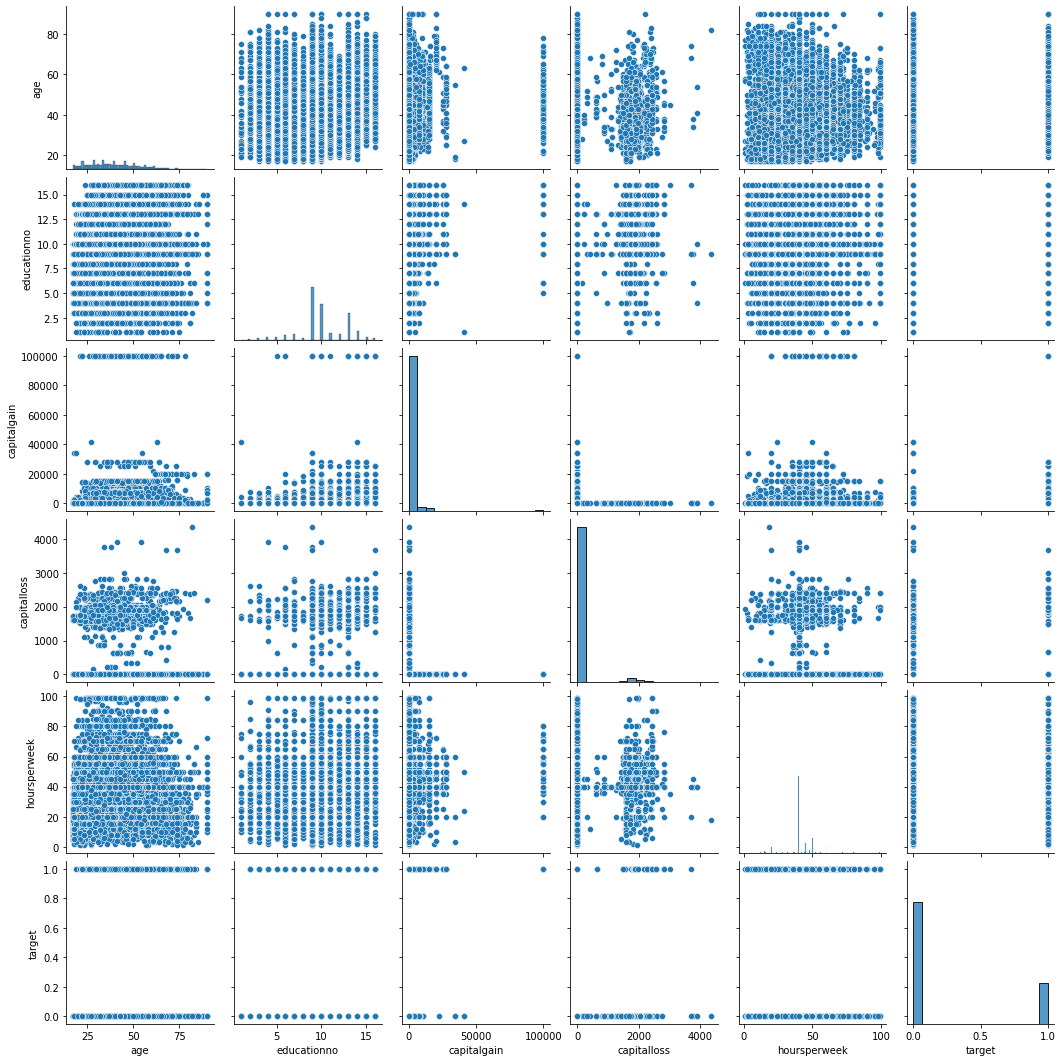

In [139]:
sns.pairplot(df_train)

In [29]:
## Importing train data

In [30]:
X_train = df_train.drop([ 'Salary', ], axis=1)

In [31]:
X_train = pd.get_dummies(X_train, columns=['workclass', 'education','maritalstatus','occupation','relationship','race','sex','native'], drop_first=True)

In [33]:
X_train

,age,educationno,capitalgain,capitalloss,hoursperweek,target,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
X_train.shape

(30161, 95)

In [111]:
X_train = X_train.drop(['target'],axis=1)

In [35]:
y_train =df_train['target']

In [36]:
#PLotting Graph to see relation between age_group and their count

<AxesSubplot:xlabel='Salary', ylabel='age'>

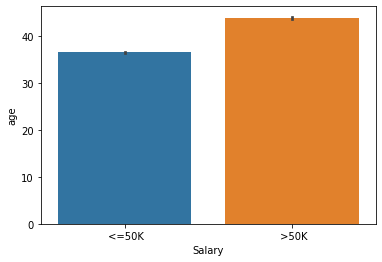

In [37]:
sns.barplot(x= 'Salary',y='age',data= df_train)

In [63]:
## Importing test data

In [91]:
df_test =pd.read_csv("E:\\deeksha\\python\\data\\SalaryData_Test.csv")

In [92]:
df_test.size

210840

In [93]:
df_test['target'] = np.where(df_test["Salary"] == ' >50K', 1, 0)

In [94]:
df_test.drop(['Salary'],axis=1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,target
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [95]:
X_test= df_test.drop(['Salary'],axis=1)

In [96]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,target
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [97]:
df_test['target'] = np.where(df_test["Salary"] == ' >50K', 1, 0)

In [98]:
X_test = df_test.drop(['target','Salary'], axis=1)

In [99]:
X_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'],
      dtype='object')

In [100]:
df_test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,target
age,1.000000,0.026123,0.078760,0.057745,0.102758,0.227469
educationno,0.026123,1.000000,0.131750,0.085817,0.133691,0.327813
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501,0.220882
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712,0.145967
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000,0.222665
target,0.227469,0.327813,0.220882,0.145967,0.222665,1.000000


In [101]:
X_test = pd.get_dummies(X_test, columns=['workclass', 'education','maritalstatus','occupation','relationship','race','sex','native'], drop_first=True)

In [102]:
X_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [113]:
X_test.shape

(15060, 94)

In [104]:
X_test.size

1415640

In [112]:
X_train.shape

(30161, 94)

In [106]:
y_test= df_test['target']

In [107]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: target, Length: 15060, dtype: int32

#### Building Model 

In [114]:
from sklearn.metrics import classification_report

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
model = GaussianNB()

In [117]:
model.fit(X_train, y_train)

GaussianNB()

In [118]:
predicted = model.predict(X_train)

In [119]:
predicted[101]

0

In [121]:
predicted = model.predict(X_test)

In [122]:
y_pred_test_proba = model.predict_proba(X_test)

In [123]:
y_pred_test_proba[101]

array([0.1867118, 0.8132882])

In [124]:
1.92399716e-10

1.92399716e-10

In [125]:
from sklearn.metrics import precision_score, recall_score

In [126]:
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Precision: 0.62
Recall: 0.73
